<h1>Zelf een social media chatbot maken<h1/>

Vandaag gaan jullie kennis maken met een chatbot die je zelf gaat coderen. Deze chatbot is gebouwd met code in Python en kan veel dingen doen: 
* luisteren, praten en op jouw stem reageren
* gezichten herkennen (zoals in Facebook!)
* gezichten maskeren met verschillende funfilters (zoals in Snapchat!).

<img src="chat-icon.png" height="30%" width="30%">

<h2>Introductie</h2>
Tijdens het komende uur zullen jullie de chatrobot steeds slimmer maken. We gaan de Chatbot bouwen in drie stappen:
1. We leren de Chatbot praten. We gaan haar een “mond” geven en jou leren hoe je de Chatbot instrueert wat zij moet zeggen.
2. We leren de Chatbot luisteren. We geven haar “oren” en zorgen dat zij wat jij zegt kan vertalen naar tekst (van geluid, naar geschreven tekst)
3. We gaan de Chatbot leren reageren op wat jij zegt. We leren haar vragen van jou te beantwoorden. 

Volg de instructies stap voor stap en let goed op dat je de code goed overneemt: computers zijn heel precies en een klein foutje kan ervoor zorgen dat je code niet werkt. 

Loop je vast? 
Kijk dan goed of je de code goed hebt overgenomen. Let ook op dat witruimte aan het begin van de regel (waar de tekst inspringt) voor Python belangrijk is. Zorg dat je daar met de Tab-toets of spatiebalk ook witruimte maakt. 

<h2>Opdracht 1 – Opstarten & Praten</h2>
Ok, we gaan beginnen! Om de robot te leren praten gebruiken we de code uit cell 1 en cell 2.
Wat de code in cell 1 doet is het volgende: deze regels importeren code die anderen geschreven hebben die wij weer kunnen gebruiken. Zo hoeven we bijvoorbeeld niet na te denken over hoe de luidspreker van je laptop werkt. Iemand anders heeft dat al bedacht en code voor geschreven. 

In [2]:
from gtts import gTTS
from playsound import playsound
import speech_recognition as sr
import os
import cv2
import numpy as np
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline

De regel in de volgende cell dat met "def" begint is de start van een functie. 
Een functie is een stukje code die je zelf vaker wilt gebruiken en zo makkelijker kunt aanroepen. 

In plaats van elke keer alles te schrijven hoef je nu als je bijvoorbeeld "Hoi, hoe gaat het" wilt zeggen alleen maar "say("Hoi, hoe gaat het")" te schrijven. 
De regels daaronder doen het echte werk: de tekst-to-speech functie van Google wordt aangeroepen en er komt een geluidsbestand terug. Die speelt jouw computer af en voila: je computer kan praten!

In [2]:
def say(text, language='nl'):
	tts = gTTS(text, lang=language)
	print("Bea zegt: "+text)
	filename = "temp.mp3"
	tts.save(filename)
	playsound(filename)
	os.remove(filename)

Toen je de code hierboven uitvoert, zal je merken dat er nog niks gebeurt. Hoe kan dit? 

Dat komt omdat je wel de functie "say(..)" hebt gemaakt, maar deze nog niet aanroept. Aanroepen gaat heel makkelijk. Gebruik de code uit de cell hieronder.

In [3]:
say("Hallo, mijn naam is Bea de Chatbot.")

Bea zegt: Hallo, mijn naam is Bea de Chatbot.


Cool he? Kun je de code aanpassen en de Chatbot andere dingen laten zeggen? 

In [ ]:
# laat Bea iets anders zeggen


Bea kent veel talen! Ze kan bijvoorbeeld ook in het Fraans praten:

In [4]:
say("Salut, je suis contente parce que je parle beaucoup de langues.", language="fr")

Bea zegt: Salut, je suis contente parce que je parle beaucoup de langues.


Spreek je nog een andere taal? Dan probeer om Bea iets in die taal te zeggen! Dit zijn de talen die je kan uitproberen:
    1. 'en' for English
    2. 'fr' for French
    3. 'de' for German
    4. 'it' for Italian
    5. 'es' for Spanish
    6. 'pt' for Portuguese
    7. 'ja' for Japanese

In [ ]:
# laat Bea in een andere taal praten 


<h2>Opdracht 2 – Luisteren</h2>
Dat was praten. Nu gaan we zorgen dat de Chatbot kan luisteren! 
De code uit de volgende cell creëert een functie om de chatbot leren te luisteren.
Met de functie "listen(..)" (weer een functie!) kunnen we luisteren naar het geluid via de microfoon en dat in geschreven tekst omzetten. 

Deze code doet het volgende. We starten de spraakherkenner met “r = sr.Recognizer()”. Dan zeggen we bij de regel die begint met “with” dat de spraakherkenner naar de audio uit de microfoon moet luisteren tot zij geluid heeft opgevangen. 

De regel die begint met “Try” vertelt de computer dat zij de code op de regel erop moet proberen uit te voeren. 
Die regel stuurt het geluid naar de servers van Google en krijgt (als alles goed gaat!) een geschreven tekst terug. Mocht dat misgaan dan zijn de regels erop (die beginnen met “Except”) bedoeld om te zeggen dat het misging. 

In [4]:
def listen():
	r = sr.Recognizer()
	with sr.Microphone() as source:
		#audio = r.adjust_for_ambient_noise(source)
		print("Bea is aan het luisteren...")
		audio = r.listen(source)
	try:
		audio = r.recognize_google(audio, language="nl")
		print("Je hebt gezegd: "+audio)
		return audio.lower()
	except sr.UnknownValueError:
		print("Ik kon je niet verstaan")
		return None
	except sr.RequestError as e:
		print("Oeps, er is een fout; {0}".format(e))
		return None

Nu wil je vast wel eens zien hoe deze functie werkt? Gebruik daarvoor de code uit de volgende cell.

In [18]:
say("Wat is jouw naam?")
name = listen()
if name is not None:
    say("Hallo " + name + ", Leuk je te ontmoeten!")

Bea zegt: Wat is jouw naam?
Bea is aan het luisteren...
Je hebt gezegd: Rosa
Bea zegt: Hallo rosa, Leuk je te ontmoeten!


Kijk naar de code hieronder. Wat kan je zeggen om Bea 'tot ziens' laten zeggen? Laten we maar proberen!

<h2>Opdracht 3 – Vragen beantwoorden</h2>
Nu de robot kan praten en kan luisteren willen we dat de Chatbot gaat reageren op jouw vragen. 
We beginnen met een simpele vraag en maken het dan iets moeilijker. 
Ben je er klaar voor? 

Als je de code hieronder nu uitvoert gebeurt er het volgende. De While loop waarmee de code begint zorgt ervoor dat de code eronder continue herhaalt wordt. Je programma houdt dus nooit meer op (tenzij jij het zegt te stoppen natuurlijk). Dan wordt er een Dictionary aangemaakt. We slaan hier een combinatie van sleutelwoorden en antwoorden op. Dit wordt belangrijk voor de Chatbot: zij kijkt of zij deze sleutelwoorden in jouw vraagt ziet en reageert dan met het antwoord. Met "question = listen()" luistert de Chatbot naar jouw vraag. Als de vraag niet None is heb jij iets gezegd. Zij kijkt dan of een van zijn sleutelwoorden ("keyword") in jouw vraag voorkwam en als dat zo is geeft zij het bijpassende antwoord. 

In [ ]:
# TODO: Add examples related to social media
keyword_and_answers = {
    "wat kun je": "Ik kan veel. Maar alleen wat jij mij leert.",
    "hoe heet je": "Mijn naam is Bea de Chatbot",
    "spruitjes": "Spruitjes vind ik heel vies!",
    "gebruik je facebook": "ja dat vind ik leuk!"
}
stop = False
while not stop:
	say("Wat kan ik voor jou doen?")
	question = listen()
	if question is not None:
		print("I am trying to answer")
		stop = True
		for keyword, answer in keyword_and_answers.items():
			if keyword in question:
				say(answer)
				stop = False
		if stop:
			say("Dankjewel. Tot ziens!")

<h2>Opdracht 4 – Gezichten herkennen</h2>
Facebook.

In [5]:
def detect_faces_from_image(image_path):
    # load image
    img = cv2.imread(image_path)

    # convert to grayscale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # load pre-trained face classifier 
    face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces_rects = face_classifier.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)
    print('Faces found: ', len(faces_rects))

    for (x, y, w, h) in faces_rects:
        cv2.rectangle(img, (x, y), (x+w, y+h), color=(255, 205, 50), thickness=15)

    # convert to RGB and display image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [19]:
def detect_faces_from_image2(image_path):
    # load image
    img = cv2.imread(image_path)

    # convert to rgb image
    rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # load pre-trained face classifier 
    faces_rects = face_recognition.face_locations(rgb_image)
    print('Faces found: ', len(faces_rects))

    for (top, right, bottom, left) in faces_rects:
        cv2.rectangle(img, (left, top), (right, bottom), color=(255, 205, 50), thickness=15)

    # convert to RGB and display image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

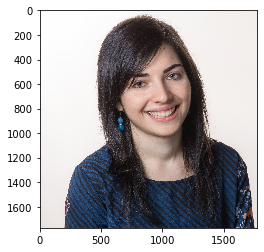

In [9]:
#Loading the image to be tested
test_image = cv2.imread('rosa.siervo.jpg')

# Displaying the image
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

Faces found:  1


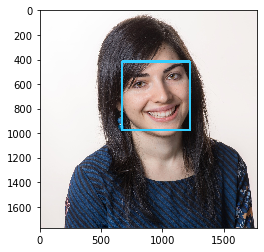

In [20]:
image = "rosa.siervo.jpg"
detect_faces_from_image(image)

In [ ]:
def detect_faces_from_camera():
    # get stream pointer to the default camera
    cap = cv2.VideoCapture(0)

    # load pre-trained face classifier 
    face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    
    # loop over frames from the video file stream   
    while True:
        # grab the current frame from the video stream and its return code (which can be ignored)
        ret, frame = cap.read()

        # convert to grayscale as opencv face detector expects gray images (because it was trained on gray images)
        gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # detect faces in the frame
        faces_rects = face_classifier.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

        # add bounding boxes around detected faces
        for (x, y, w, h) in faces_rects:
                cv2.rectangle(frame, (x, y), (x+w, y+h), color=(255, 205, 50), thickness=2)

        # display the resulting frame
        cv2.imshow('Video', frame)

        # if the ‘q’ key is pressed or the window is manually closed, exit the while loop
        if ((cv2.waitKey(1) & 0xFF == ord('q')) or (cv2.getWindowProperty('Video',cv2.WND_PROP_VISIBLE) < 1)):
            break
    
    # close the window 
    cap.release()
    # de-allocate any associated memory usage 
    cv2.destroyAllWindows()

In [29]:
def detect_faces_from_camera2():
    # get stream pointer to the default camera
    cap = cv2.VideoCapture(0)

    # loop over frames from the video file stream   
    while True:
        # grab the current frame from the video stream and its return code (which can be ignored)
        ret, frame = cap.read()

        # convert to rgb image
        rgb_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # load pre-trained face classifier 
        faces_rects = face_recognition.face_locations(rgb_image)

        for (top, right, bottom, left) in faces_rects:
            cv2.rectangle(frame, (left, top), (right, bottom), color=(255, 205, 50), thickness=2)

        # display the resulting frame
        cv2.imshow('Video', frame)

        # if the ‘q’ key is pressed or the window is manually closed, exit the while loop
        if ((cv2.waitKey(1) & 0xFF == ord('q')) or (cv2.getWindowProperty('Video',cv2.WND_PROP_VISIBLE) < 1)):
            break
    
    # close the window 
    cap.release()
    # de-allocate any associated memory usage 
    cv2.destroyAllWindows()


In [30]:
detect_faces_from_camera()

<h2>Opdracht 4 – Gezichten maskeren met Funfilters</h2>
Snapchat.

Heel goed gedaan! Nadat Bea het gezicht kan vinden, wil ze een hoed opzetten! Op deze manier kan ze hetzelfde als in Snapchat! Kan je haar helpen?

In [10]:
def mask_faces_from_image_with_dog(image_path, mask_path):
    # load image
    img = cv2.imread(image_path)
        
    # convert to grayscale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # load pre-trained face classifier 
    face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces_rects = face_classifier.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)
    print('Faces found: ', len(faces_rects))
    
    # load the mask
    mask = cv2.imread(mask_path)
    for (x, y, w, h) in faces_rects:
        # draw bounding box around the detected face
        #cv2.rectangle(img, (x, y), (x+w, y+h), color=(255, 205, 50), thickness=2)
        # crop a frame slightly larger than the face
        if int(y - 0.20*h) > 0:
            y = int(y - 0.20*h)
        h = int(0.80*h) 
        
        # resize the mask to fit on face
        mask = cv2.resize(mask, (w, h))
        
        # compute pixels in the mask that are not white or near-white
        non_white_pixels = (mask < 250).all(axis=2)
        # put the mask on top of the face
        img[y: y+h, x:x+w][non_white_pixels] = mask[non_white_pixels]

    # convert to RGB and display image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [47]:
def mask_faces_from_image_with_dog2(image_path, mask_path):
    # load image
    img = cv2.imread(image_path)
    
    # convert to rgb image
    rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # load pre-trained face classifier 
    faces_rects = face_recognition.face_locations(rgb_image)
    print('Faces found: ', len(faces_rects))

    # load the mask
    mask = cv2.imread(mask_path)
    for (top, right, bottom, left) in faces_rects:
        x = left
        y = top
        w = right - x
        h = bottom - y

        # draw bounding box around the detected face
        #cv2.rectangle(img, (x, y), (x+w, y+h), color=(255, 205, 50), thickness=2)
        # crop a frame slightly larger than the face
        if int(y - 0.20*h) > 0:
            y = int(y - 0.20*h)
        h = int(0.80*h) 
        
        # resize the mask to fit on face
        mask = cv2.resize(mask, (w, h))
        
        # compute pixels in the mask that are not white or near-white
        non_white_pixels = (mask < 250).all(axis=2)
        # put the mask on top of the face
        img[y: y+h, x:x+w][non_white_pixels] = mask[non_white_pixels]

    # convert to RGB and display image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Faces found:  2


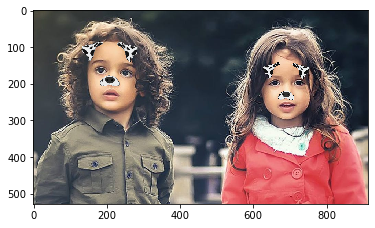

In [48]:
# Current options: 'dalmatian_mask.png' 'sheepdog_mask.png', 'dog_mask.png'
mask_faces_from_image_with_dog('kids.png', 'dalmatian_mask.png')

In [17]:
def mask_faces_from_camera_with_dog(mask_path):
    # get stream pointer to the default camera
    cap = cv2.VideoCapture(0)

    # load pre-trained face classifier 
    face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    
    # load the mask
    mask = cv2.imread(mask_path)
    
    # loop over frames from the video file stream   
    while True:
        # grab the current frame from the video stream and its return code (which can be ignored)
        ret, frame = cap.read()

        # convert to grayscale as opencv face detector expects gray images (because it was trained on gray images)
        gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # detect faces in the frame
        faces_rects = face_classifier.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

        # add bounding boxes around detected faces
        for (x, y, w, h) in faces_rects:
            #cv2.rectangle(frame, (x, y), (x+w, y+h), color=(255, 205, 50), thickness=2)
            # crop a frame slightly larger than the face
            if int(y - 0.20*h) > 0:
                y = int(y - 0.20*h)
            h = int(0.80*h) 

            # resize the mask to fit on face
            resized_mask = cv2.resize(mask, (w, h))

            # compute pixels in the mask that are not white or near-white
            non_white_pixels = (resized_mask < 250).all(axis=2)
            # put the mask on top of the face
            frame[y: y+h, x:x+w][non_white_pixels] = resized_mask[non_white_pixels]

            # display the resulting frame
            cv2.imshow('Video', frame)

        # if the ‘q’ key is pressed or the window is manually closed, exit the while loop
        if ((cv2.waitKey(1) & 0xFF == ord('q')) or (cv2.getWindowProperty('Video',cv2.WND_PROP_VISIBLE) < 1)):
            break
    
    # close the window 
    cap.release()
    # de-allocate any associated memory usage 
    cv2.destroyAllWindows()

In [49]:
def mask_faces_from_camera_with_dog2(mask_path):
    # get stream pointer to the default camera
    cap = cv2.VideoCapture(0)

    # load the mask
    mask = cv2.imread(mask_path)
    
    # loop over frames from the video file stream   
    while True:
        # grab the current frame from the video stream and its return code (which can be ignored)
        ret, frame = cap.read()

        # convert to rgb image
        rgb_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # load pre-trained face classifier 
        faces_rects = face_recognition.face_locations(rgb_image)

        # add bounding boxes around detected faces
        for (top, right, bottom, left) in faces_rects:
            x = left
            y = top
            w = right - x
            h = bottom - y
            #cv2.rectangle(frame, (x, y), (x+w, y+h), color=(255, 205, 50), thickness=2)
            # crop a frame slightly larger than the face
            if int(y - 0.20*h) > 0:
                y = int(y - 0.20*h)
            h = int(0.80*h) 

            # resize the mask to fit on face
            resized_mask = cv2.resize(mask, (w, h))

            # compute pixels in the mask that are not white or near-white
            non_white_pixels = (resized_mask < 250).all(axis=2)
            # put the mask on top of the face
            frame[y: y+h, x:x+w][non_white_pixels] = resized_mask[non_white_pixels]

            # display the resulting frame
            cv2.imshow('Video', frame)

        # if the ‘q’ key is pressed or the window is manually closed, exit the while loop
        if ((cv2.waitKey(1) & 0xFF == ord('q')) or (cv2.getWindowProperty('Video',cv2.WND_PROP_VISIBLE) < 1)):
            break
    
    # close the window 
    cap.release()
    # de-allocate any associated memory usage 
    cv2.destroyAllWindows()

In [54]:
mask_faces_from_camera_with_dog('dog_mask.png')

In [ ]:
#TODO: See if there is a way for me to use face_recognition instead of OpenCV for face detection because it is more intuitive and performs better. 